# Example - Vedení tepla v čase

# Modelování procesu vedení tepla v čase

## Textový popis
Tento projek se zabývá numerickou simulací procesu vedení tepla v pevných látkách. Konkrétně se jedná o modelování zjednodušené varianty 2D problému vedení tepla v čase.


Uvažujeme oblast tvaru obdélníku o stranách $a \times b$. 
V počátečním čase $t=0$ má každý bod oblasti určitou teplotu. Úkolem je modelovat průběh vedení tepla v čase, tedy spočítat teplotu v oblasti v časových krocích $t=dt$, $t=2dt$, $\ldots$, $t=Ndt$. Teplotu budeme reprezentovat pomocí funkce
$u:\mathbb{R}^{3}\rightarrow\mathbb{R}$,
hodnota $u\left(x,y,t\right)$ udává teplotu v bodě o souřadnicích
$\left(x,y\right)$ v čase $t$. 

Numerická simulace bude založena na fyzikální simulaci v jednotlivých časových krocích. Oblast diskretizujeme (rouzdělíme) na
shodné obdélníkové podoblasti o stranách $dx \times dy$.
Teplotu v každé podoblasti budeme reprezentovat pomocí hodnoty teploty ve středu této podoblasti. V každém časovém kroku poté spořítáme rozdíly teplot mezi sousedními podoblastmi (sdílejícími hranu) a tyto rozdíly přepočítáme do změny teploty v každé podoblasti. 

Změny teplot jsou zadány vztahem: 

$
u\left(x,y,t+dt\right)\approx u\left(x,y,t\right)+\frac{2}{\rho\left(x,y\right)c\left(x,y\right)}dt\left(\frac{u\left(x-dx,y,t\right)-u\left(x,y,t\right)}{\left(\frac{1}{\lambda\left(x,y\right)}+\frac{1}{\lambda\left(x-dx,y\right)}\right)dx^{2}}+
\frac{u\left(x,y+dy,t\right)-u\left(x,y,t\right)}{\left(\frac{1}{\lambda\left(x,y\right)}+\frac{1}{\lambda\left(x,y+dy\right)}\right)dy^{2}}+\frac{u\left(x+dx,y,t\right)-u\left(x,y,t\right)}{\left(\frac{1}{\lambda\left(x,y\right)}+\frac{1}{\lambda\left(x+dx,y\right)}\right)dx^{2}}+\frac{u\left(x,y+dy,t\right)-u\left(x,y,t\right)}{\left(\frac{1}{\lambda\left(x,y\right)}+\frac{1}{\lambda\left(x,y+dy\right)}\right)dy^{2}}\right),
$

kde $\lambda$ je součinitel tepelné vodivosti, $\rho$ je hustota a $c$ je měrná tepelná kapacita. Parametry $\lambda$, $\rho$ a $c$ budou zadány na vstupu jako matice o stejných rozměrech jako je diskretizace oblasti. $\rho$ a $c$ se vyskytují vždy pohromadě, proto budou na vstupu dohromady. Dalším vstupem bude také počáteční teplota v každé podoblasti.

Okrajové podmínky budou uvažováný jak tzv. nulové Neumannovy podmínky, tedy nepředpokládá se únik tepla mimo sledovanou oblast. Toto je automaticky splněno v našem případě, protože v každém časovém kroku se teplota v každé podoblasti přepočítává pouze z hodnot teploty v sousedních podoblastech.

## Funcionalita
- načtení vtupních dat ze souborů
- implementace jednoho kroku numerické simulace pomocí cyklu
- implementace kroku numerické simulace jako násobení maticí = sestavení této matice ve sparse formátu
- simulace vedení tepla v čase do zadaného časového horizontu
    - porovnání časové náročnosti obou implementací
- vykreslení teploty v libovolném čase
- vytvoření animace vedení tepla v čase a uložení do souboru

In [1]:
import projekt

In [2]:
C = projekt.Obrazec("cihly")

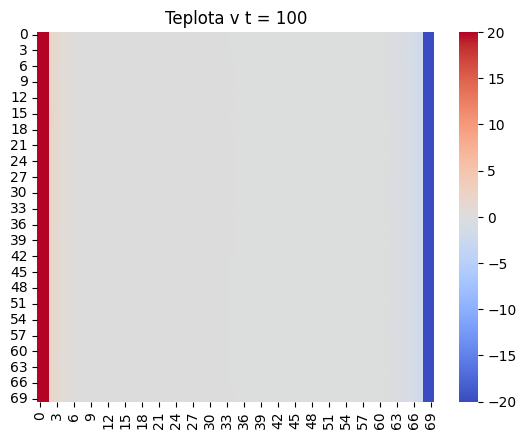

In [3]:
projekt.run_u(C,100)

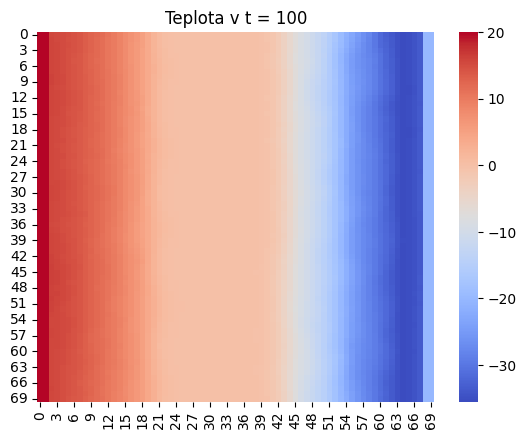

In [4]:
projekt.run_u_sparse(C,100)

In [5]:
projekt.porovnej(C,100)

Vypocet U: 2.5531797409057617
Vypocet sparse U: 2.267226219177246


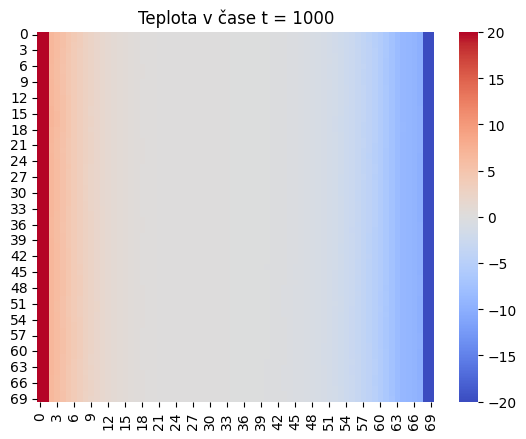

In [6]:
C.vykresli_cas(1000)

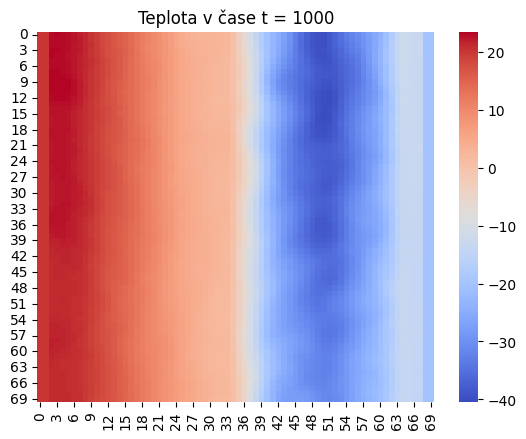

In [7]:
C.vykresli_cas_sparse(1000)

In [9]:
S = projekt.Obrazec("spirala")

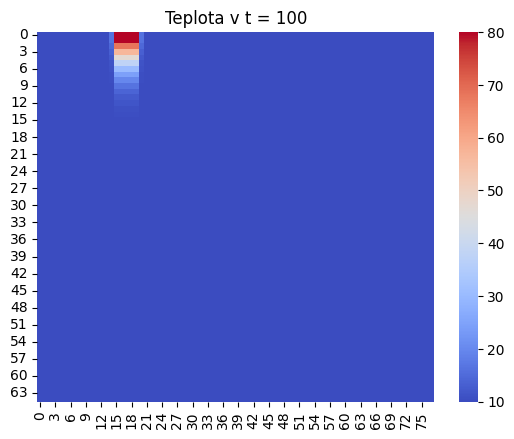

In [10]:
projekt.run_u(S,100)

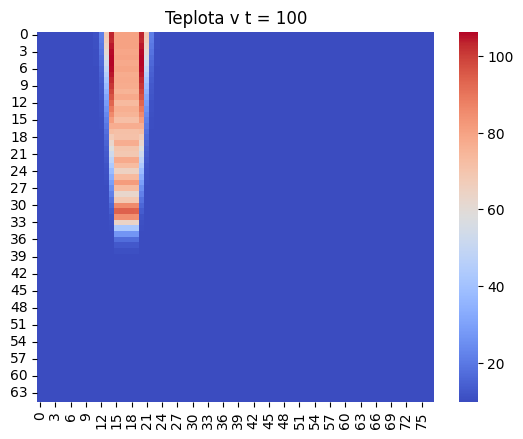

In [11]:
projekt.run_u_sparse(S,100)

In [12]:
projekt.porovnej(S,100)

Vypocet U: 14.89648175239563
Vypocet sparse U: 5.812447547912598


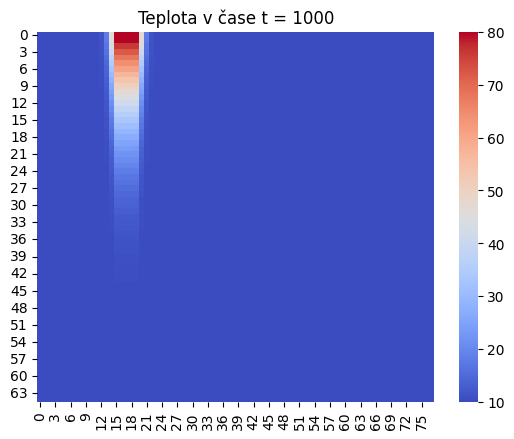

In [13]:
S.vykresli_cas(1000)

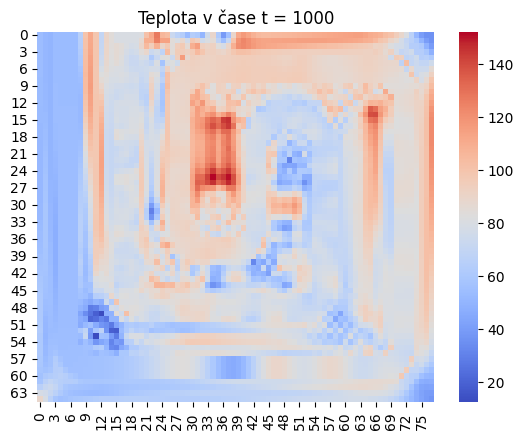

In [14]:
S.vykresli_cas_sparse(1000)